<a href="https://colab.research.google.com/github/naskar002/Machine-Learning-Projects/blob/main/Building_linear_regressor_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
import numpy as np

class Linear_Regressor():
    def __init__(self, learning_rate=0.001, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        self.X = X
        self.y = y
        # Implementing gradient descent
        for i in range(self.epochs):
            self.update_weights()

    def update_weights(self):
        y_pred = self.predict(self.X)
        dw = -2 * (self.X.T).dot(self.y - y_pred) / self.n_samples
        db = -2 * np.sum(self.y - y_pred) / self.n_samples
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.weights) + self.bias


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/MyDrive/datasets/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
X = df.drop('price',axis=1)
y = df['price']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = Linear_Regressor(learning_rate=0.01,epochs=1000)
model.fit(X_train,y_train)

In [13]:
predictions = model.predict(X_train)
print(predictions)

[10.82339727 19.52549807 23.23204263 12.02018274 18.45064451 25.28892759
 20.66159769 24.04958081  7.8381383  19.52631014 21.74682725 27.3782592
 32.54172364 15.10008188 35.2941851  13.09862906 20.89460931 28.19216001
 15.58681276 24.48661572  4.8849781  24.03792002 25.49328497 22.95863167
 24.59059875 33.89795481 20.01381343 38.85485594 13.8891878  25.46065118
 18.13372858 21.14021705  9.71762099 20.72186784 22.12944363 31.41201888
 31.01254566 15.82437092 17.1342098  28.27850143 24.16324776 16.81489476
  6.9885666  26.31151475 22.86538465 17.53079649 13.87743502 41.01390591
 16.40592984 18.21473638 25.40770019 23.9399787  21.91698953 20.97116107
 16.84305104 22.77416344 29.21661647  7.90667856 24.42455319 16.99778265
 21.37254933 25.13356429 27.10163755 21.46826785 41.55342481 19.07482466
 15.49827148 19.3504816  18.02454686 23.21124762 23.04786275 33.6971088
 22.63944808 20.55942545 25.62359498 31.0626436  33.36049999 28.19519969
  8.62380249  5.44529369 12.68552109 19.91390659 34.7

In [14]:
from sklearn.metrics import r2_score
r2_score(y_train,predictions)

0.7503447132254943

In [15]:
test_pred = model.predict(X_test)
r2_score(y_test,test_pred)

0.6633041314217367

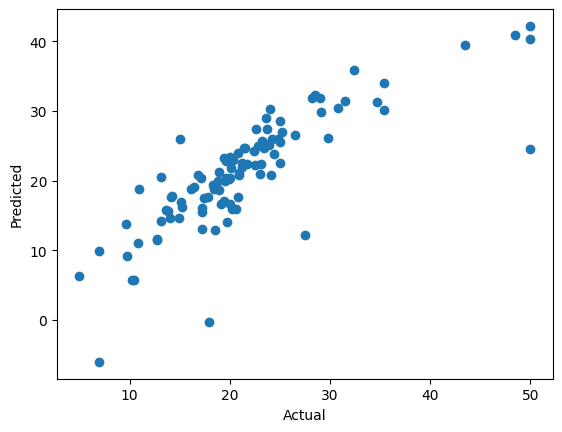

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test,test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [17]:
weight = np.zeros(X_train.shape[1])

In [19]:
weight.shape

(13,)

In [22]:
new = weight.reshape(-1,1)

In [24]:
new.shape

(13, 1)